# Project 3

In [1]:
import sys
import random
import os
from pathlib import Path

%matplotlib inline
import matplotlib  # plotting library
import matplotlib.pyplot as plt  # plotting package
import numpy as np  #numerical package in python
import pandas as pd
import sklearn

random.seed(42)

ROOT_DIR = "."
DATA_PATH = os.path.join(ROOT_DIR, "data")


#pls no mark off for poor naming, ik it's not housing
#but i'm rlly low on time in my classes and my keyboard is half-broken (using on-screen keyboard for many keys)

def load_housing_data(housing_path):
    csv_path = os.path.join(DATA_PATH, housing_path)
    return pd.read_csv(csv_path)

arp_data = load_housing_data("BrandAverageRetailPrice.csv") # we load the pandas dataframe
details_data = load_housing_data("BrandDetails.csv") # we load the pandas dataframe
sales_data = load_housing_data("BrandTotalSales.csv") # we load the pandas dataframe
units_data = load_housing_data("BrandTotalUnits.csv") # we load the pandas dataframe

In [2]:
arp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27211 entries, 0 to 27210
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brands            27211 non-null  object 
 1   Months            27211 non-null  object 
 2   ARP               25279 non-null  float64
 3   vs. Prior Period  24499 non-null  float64
dtypes: float64(2), object(2)
memory usage: 850.5+ KB


In [3]:
#1 combining data sets


In [4]:
# Rename columns for ease in combining them.
units_data = units_data.rename(columns={'vs. Prior Period':'vs. Prior Period Units'})
arp_data = arp_data.rename(columns={'vs. Prior Period':'vs. Prior Period Units ARP'})
sales_data =sales_data.rename(columns={'Brand':'Brands'})

alo = pd.merge(pd.merge(units_data, arp_data, on = ["Brands", "Months"], how = 'outer'), sales_data, on = ["Brands", "Months"], how = 'outer')


alo["Months"].unique()

array(['08/2020', '09/2020', '01/2021', '02/2021', '03/2021', '11/2019',
       '12/2019', '01/2020', '02/2020', '03/2020', '04/2020', '05/2020',
       '06/2020', '07/2020', '10/2020', '11/2020', '12/2020', '04/2021',
       '05/2021', '06/2021', '07/2021', '08/2021', '09/2021', '08/2018',
       '09/2018', '10/2018', '11/2018', '12/2018', '01/2019', '02/2019',
       '03/2019', '04/2019', '05/2019', '08/2019', '09/2019', '10/2019',
       '06/2019', '07/2019'], dtype=object)

At this point we've combined these three pretty cleanly afaik, but the problem now lies in that there doesn't seem to be any sort of notion of time especially in months for the last one which is details_file. Also that they're talking about individual products now which we didn't really deal with in the other three. so combining this with the amalgmation of the other three will be somewhat messy.

Here i'm thinking of making a separate column for each month (Sort of like onehotencoding) although this will create extraneous
stuff.

Now i want to merge the details info with our alo combination. it's somewhat tricky to do this because they're mismatched in multiple ways, so for this one i'll go with the easier way and take what i want out of the details data into alo. this is because i spent too long getting stuck on the other way with python sytnax which i'm not familiar with. i will likely try the other way 

In [5]:
alo['Months'] = pd.to_datetime(alo['Months'])
#Total units is too large currently to convert to a float
#need to trim it first then convert to float
alo['Total Units'] = alo['Total Units'].str[:8].str.replace(",","")
alo['Total Units'] = pd.to_numeric(alo['Total Units'])

alo['Months'] = pd.to_datetime(alo['Months'])
alo['Total Sales ($)'] = alo['Total Sales ($)'].str[:8].str.replace(",","")
alo['Total Sales ($)'] = pd.to_numeric(alo['Total Sales ($)'])

alo.head(30)

,Brands,Months,Total Units,vs. Prior Period Units,ARP,vs. Prior Period Units ARP,Total Sales ($)
0,#BlackSeries,2020-08-01,1616.3300,NaN,15.684913,NaN,25352.10
1,#BlackSeries,2020-09-01,NaN,-1.000000,NaN,-1.000000,NaN
2,#BlackSeries,2021-01-01,715.5328,NaN,13.611428,NaN,9739.42
3,#BlackSeries,2021-02-01,766.6691,0.071466,11.873182,-0.127705,9102.80
4,#BlackSeries,2021-03-01,NaN,-1.000000,NaN,-1.000000,NaN
5,101 Cannabis Co.,2019-11-01,131.0677,NaN,34.066667,NaN,4465.04
6,101 Cannabis Co.,2019-12-01,NaN,-1.000000,NaN,-1.000000,NaN
7,101 Cannabis Co.,2020-01-01,345.4134,NaN,34.134929,NaN,11790.60
8,101 Cannabis Co.,2020-02-01,696.6584,1.016883,29.091388,-0.147753,20266.70
9,101 Cannabis Co.,2020-03-01,943.3933,0.354169,32.293498,0.110071,30465.40


In [6]:
temp = pd.DataFrame()

for brand in alo.Brands.unique():
    units = alo[alo.Brands == brand]

    units.loc[:,'Previous Month T. Units'] = units.loc[:,'Total Units'].shift(1)
    # inserting another column with difference between yesterday and day before yesterday's consumption values.

    units.loc[:,'Rolling Average T. Units'] = (units.loc[:,'Total Units'].shift(1) + units.loc[:,'Total Units'].shift(2) + units.loc[:,'Total Units'].shift(3))/3


    units.loc[:,'Previous Month ARP'] = units.loc[:,"ARP"].shift(1)
    # inserting another column with difference between yesterday and day before yesterday's consumption values


    units.loc[:,'Previous Month Sales'] = units.loc[:,"Total Sales ($)"].shift(1)
    # inserting another column with difference between yesterday and day before yesterday's consumption values.

    units.loc[:,'Rolling Average Sales'] = (units.loc[:,"Total Sales ($)"].shift(1) + units.loc[:,"Total Sales ($)"].shift(2) + units.loc[:,"Total Sales ($)"].shift(3))/3

    units["Average Sales for this Year"] = units.groupby(units.Months.dt.year)['Total Sales ($)'].transform('mean')

    units["Average Sales for this Month of Year"] = units.groupby(units.Months.dt.month)['Total Sales ($)'].transform('mean')

    units["Average Units Sold for this Year"] = units.groupby(units.Months.dt.year)['Total Units'].transform('mean')

    units["Average Units Sold for this Month of Year"] = units.groupby(units.Months.dt.month)['Total Units'].transform('mean')

    units["Cumulative Average Monthly Sales"] = units['Total Sales ($)'].mean()
    
    units["Cumulative Average Monthly Units"] = units['Total Units'].mean()
    
    #do # of unique product names and unique product types

    temp = pd.concat([temp, units])

alo = temp
alo.head(20)

#.........................


C:\Users\cxcha\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\cxcha\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-6-0987dd8cf07f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Brands,Months,Total Units,vs. Prior Period Units,ARP,vs. Prior Period Units ARP,Total Sales ($),Previous Month T. Units,Rolling Average T. Units,Previous Month ARP,Previous Month Sales,Rolling Average Sales,Average Sales for this Year,Average Sales for this Month of Year,Average Units Sold for this Year,Average Units Sold for this Month of Year,Cumulative Average Monthly Sales,Cumulative Average Monthly Units
0,#BlackSeries,2020-08-01,1616.3300,NaN,15.684913,NaN,25352.10,NaN,NaN,NaN,NaN,NaN,25352.100000,25352.100,1616.330000,1616.33000,14731.440000,1032.843967
1,#BlackSeries,2020-09-01,NaN,-1.000000,NaN,-1.000000,NaN,1616.3300,NaN,15.684913,25352.10,NaN,25352.100000,NaN,1616.330000,NaN,14731.440000,1032.843967
2,#BlackSeries,2021-01-01,715.5328,NaN,13.611428,NaN,9739.42,NaN,NaN,NaN,NaN,NaN,9421.110000,9739.420,741.100950,715.53280,14731.440000,1032.843967
3,#BlackSeries,2021-02-01,766.6691,0.071466,11.873182,-0.127705,9102.80,715.5328,NaN,13.611428,9739.42,NaN,9421.110000,9102.800,741.100950,766.66910,14731.440000,1032.843967
4,#BlackSeries,2021-03-01,NaN,-1.000000,NaN,-1.000000,NaN,766.6691,NaN,11.873182,9102.80,NaN,9421.110000,NaN,741.100950,NaN,14731.440000,1032.843967
5,101 Cannabis Co.,2019-11-01,131.0677,NaN,34.066667,NaN,4465.04,NaN,NaN,NaN,NaN,NaN,4465.040000,9785.670,131.067700,289.11410,18276.203636,566.557555
6,101 Cannabis Co.,2019-12-01,NaN,-1.000000,NaN,-1.000000,NaN,131.0677,NaN,34.066667,4465.04,NaN,4465.040000,11883.000,131.067700,337.96050,18276.203636,566.557555
7,101 Cannabis Co.,2020-01-01,345.4134,NaN,34.134929,NaN,11790.60,NaN,NaN,NaN,NaN,NaN,23322.408333,9924.885,724.597908,297.82270,18276.203636,566.557555
8,101 Cannabis Co.,2020-02-01,696.6584,1.016883,29.091388,-0.147753,20266.70,345.4134,NaN,34.134929,11790.60,NaN,23322.408333,16989.700,724.597908,546.24125,18276.203636,566.557555
9,101 Cannabis Co.,2020-03-01,943.3933,0.354169,32.293498,0.110071,30465.40,696.6584,NaN,29.091388,20266.70,NaN,23322.408333,27406.650,724.597908,815.12535,18276.203636,566.557555


In [7]:
# need make these into columns, put into for-loop above


In [8]:
alo.columns

Index(['Brands', 'Months', 'Total Units', 'vs. Prior Period Units', 'ARP',
       'vs. Prior Period Units ARP', 'Total Sales ($)',
       'Previous Month T. Units', 'Rolling Average T. Units',
       'Previous Month ARP', 'Previous Month Sales', 'Rolling Average Sales',
       'Average Sales for this Year', 'Average Sales for this Month of Year',
       'Average Units Sold for this Year',
       'Average Units Sold for this Month of Year',
       'Cumulative Average Monthly Sales', 'Cumulative Average Monthly Units'],
      dtype='object')

In [9]:
##### details_data.info()

#This could arguably be put in the pipeline but I view it as the means in which I combined BrandDetails with the other three
#datasets, which is more #1 than #4.

category_columns = ['Category L1', "Category L2", "Category L3", "Category L4", 'Category L5']
category_df = pd.DataFrame()
category_df['Brand'] = details_data['Brand']
#we can make truth table for all possible values depending if a brand ever sells this any product of a certain type.
for cat in category_columns:
    test_df = pd.DataFrame()
    test_df['Brand'] = details_data['Brand']
    test_df2 = details_data[['Brand', cat]]
    test_df2.drop_duplicates(inplace=True)

    for column_name in details_data[cat].unique():

        # creating a new column by checking where this row's brand value exists in our test_df2
        # dataframe filtered by 'cat' value
        category_df[cat[-2:] + ' ' + str(column_name)] = details_data['Brand'].isin(test_df2[test_df2[cat] == column_name]['Brand'])

# drop_columns = list(range(0, 25))
# drop_columns.remove(7)
# print(drop_columns)
# details_data.drop(details_data.columns[drop_columns], axis=1, inplace=True)
category_df.drop_duplicates(inplace=True)


print(category_df)

alo = alo.set_index('Brands').join(category_df.set_index('Brand'))
alo.reset_index(inplace=True)
alo = alo.rename(columns={"index": "Brands"})

alo.head()
#print(alo.head())


<ipython-input-9-43369192c974>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df2.drop_duplicates(inplace=True)


                   Brand  L1 Inhaleables  L1 Topicals  L1 Ingestibles  \
0           #BlackSeries            True        False           False   
4       101 Cannabis Co.            True        False           False   
81                 11:11            True        False           False   
254           19Forty LA           False         True           False   
257                1Lyfe            True        False           False   
...                  ...             ...          ...             ...   
144811     Zendo Edibles           False        False            True   
144872           Zenleaf           False        False           False   
144898           Zig Zag           False        False           False   
144909     Zips Weed Co.            True        False           False   
144932          Zkittlez            True        False           False   

        L1 All Accessories  L1 Other Cannabis  L2 Flower  L2 Concentrates  \
0                    False              False 

,Brands,Months,Total Units,vs. Prior Period Units,ARP,vs. Prior Period Units ARP,Total Sales ($),Previous Month T. Units,Rolling Average T. Units,Previous Month ARP,...,L5 Tea Drink,L5 Brownies,L5 Other Chocolates,L5 Lollipop,L5 Coffee Drink,L5 Flower,L5 Flower and Concentrate,L5 Dab Rig,L5 Concentrate,L5 Tools
0,#BlackSeries,2020-08-01,1616.3300,NaN,15.684913,NaN,25352.10,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,#BlackSeries,2020-09-01,NaN,-1.000000,NaN,-1.000000,NaN,1616.3300,NaN,15.684913,...,False,False,False,False,False,False,False,False,False,False
2,#BlackSeries,2021-01-01,715.5328,NaN,13.611428,NaN,9739.42,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,#BlackSeries,2021-02-01,766.6691,0.071466,11.873182,-0.127705,9102.80,715.5328,NaN,13.611428,...,False,False,False,False,False,False,False,False,False,False
4,#BlackSeries,2021-03-01,NaN,-1.000000,NaN,-1.000000,NaN,766.6691,NaN,11.873182,...,False,False,False,False,False,False,False,False,False,False


In [10]:
for column in alo.columns[18:]:
    alo[column].replace({False:0.0, True:1.0}, inplace = True)

In [11]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print(y_true)
    print(y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [12]:
alo.corr()

,Total Units,vs. Prior Period Units,ARP,vs. Prior Period Units ARP,Total Sales ($),Previous Month T. Units,Rolling Average T. Units,Previous Month ARP,Previous Month Sales,Rolling Average Sales,...,L5 Tea Drink,L5 Brownies,L5 Other Chocolates,L5 Lollipop,L5 Coffee Drink,L5 Flower,L5 Flower and Concentrate,L5 Dab Rig,L5 Concentrate,L5 Tools
Total Units,1.000000,-0.011140,-0.135363,-0.024310,0.381529,0.973898,0.966086,-0.153154,0.363105,0.367596,...,-0.016092,-0.022391,-0.006781,-0.008530,-0.015217,0.166405,0.203100,0.203100,-0.016147,-0.012195
vs. Prior Period Units,-0.011140,1.000000,-0.040921,0.027300,-0.002142,-0.030178,-0.018677,0.016791,-0.053930,-0.029817,...,-0.002907,-0.004139,-0.000145,-0.003956,-0.004670,-0.006948,-0.003475,-0.003475,-0.002776,-0.002695
ARP,-0.135363,-0.040921,1.000000,0.095541,-0.057710,-0.146764,-0.172942,0.946568,-0.058319,-0.067108,...,-0.011080,-0.027044,-0.011214,-0.028003,-0.024572,0.246252,-0.036552,-0.036552,0.224632,-0.015018
vs. Prior Period Units ARP,-0.024310,0.027300,0.095541,1.000000,-0.027629,0.074888,0.057231,-0.064552,0.121863,0.104503,...,0.005151,0.006267,0.002652,0.002471,0.002104,-0.015685,0.004451,0.004451,0.005263,-0.010152
Total Sales ($),0.381529,-0.002142,-0.057710,-0.027629,1.000000,0.357571,0.339802,-0.062656,0.831199,0.819218,...,-0.001664,-0.002044,0.023598,0.017550,0.002862,-0.008332,0.002925,0.002925,-0.003549,-0.023452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L5 Flower,0.166405,-0.006948,0.246252,-0.015685,-0.008332,0.166612,0.202276,0.252013,-0.008898,-0.003118,...,-0.002923,-0.004697,-0.002690,-0.002861,-0.003532,1.000000,0.782471,0.782471,-0.002122,-0.001686
L5 Flower and Concentrate,0.203100,-0.003475,-0.036552,0.004451,0.002925,0.204330,0.209075,-0.036662,0.002714,-0.000870,...,-0.002287,-0.003675,-0.002104,-0.002239,-0.002764,0.782471,1.000000,1.000000,-0.001660,-0.001319
L5 Dab Rig,0.203100,-0.003475,-0.036552,0.004451,0.002925,0.204330,0.209075,-0.036662,0.002714,-0.000870,...,-0.002287,-0.003675,-0.002104,-0.002239,-0.002764,0.782471,1.000000,1.000000,-0.001660,-0.001319
L5 Concentrate,-0.016147,-0.002776,0.224632,0.005263,-0.003549,-0.016292,-0.018740,0.223690,-0.003994,-0.008322,...,-0.002287,-0.003675,-0.002104,-0.002239,-0.002764,-0.002122,-0.001660,-0.001660,1.000000,-0.001319


<AxesSubplot:>

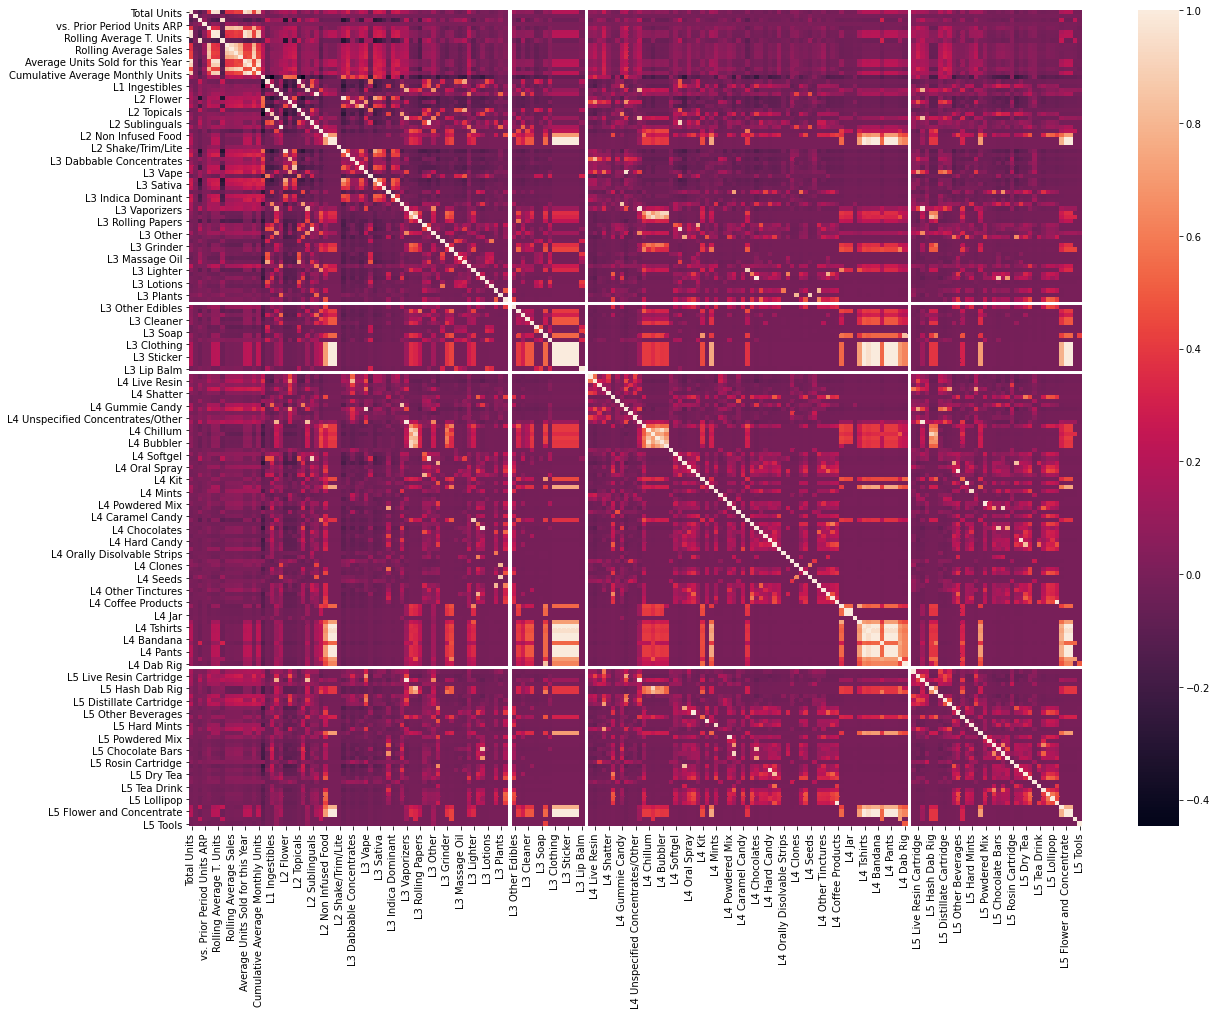

In [13]:
import seaborn as sns

plt.subplots(figsize=(20,15))
sns.heatmap(alo.corr())

In [14]:
alo.head(200)

,Brands,Months,Total Units,vs. Prior Period Units,ARP,vs. Prior Period Units ARP,Total Sales ($),Previous Month T. Units,Rolling Average T. Units,Previous Month ARP,...,L5 Tea Drink,L5 Brownies,L5 Other Chocolates,L5 Lollipop,L5 Coffee Drink,L5 Flower,L5 Flower and Concentrate,L5 Dab Rig,L5 Concentrate,L5 Tools
0,#BlackSeries,2020-08-01,1616.3300,NaN,15.684913,NaN,25352.10,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,#BlackSeries,2020-09-01,NaN,-1.000000,NaN,-1.000000,NaN,1616.3300,NaN,15.684913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,#BlackSeries,2021-01-01,715.5328,NaN,13.611428,NaN,9739.42,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,#BlackSeries,2021-02-01,766.6691,0.071466,11.873182,-0.127705,9102.80,715.5328,NaN,13.611428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,#BlackSeries,2021-03-01,NaN,-1.000000,NaN,-1.000000,NaN,766.6691,NaN,11.873182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3 Leaf,2020-04-01,764.9519,0.637920,3.003085,-0.276818,2297.21,467.0264,640.628633,4.152600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,3 Leaf,2020-05-01,NaN,-1.000000,NaN,-1.000000,NaN,764.9519,507.022600,3.003085,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,350 Fire,2018-08-01,81832.3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,350 Fire,2018-09-01,64128.9000,-0.216338,9.847509,NaN,631510.00,81832.3000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
alo = alo[alo["Total Sales ($)"].notna()]

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#drop all rows with NaN for total sales -> of no use to us.
alo = alo[alo["Total Sales ($)"].notna()]

# drop columns with very weak correlation to Total Sales
corr_matrix = alo.corr()
alo.drop(columns = corr_matrix["Total Sales ($)"].sort_values(ascending=False).loc[lambda x: x<0.2].index, inplace=True)
alo = alo.drop("Brands", axis = 1) #at this point, everything I need to know about brand has been captured
#in the other columns because everything is brand-specific i.e. L1 Inhalables is if this brand ever sells an inhalable,
#so I don't even need it anymore.

# get label
sales = alo["Total Sales ($)"]

categorical_features = ["Months"]

# remove Month basically lol
aloX = alo.drop("Total Sales ($)", axis=1)
alo_nums = aloX.drop(columns=categorical_features)

# list the numerical features
numerical_features = list(alo_nums)

# list of categorical features
class AugmentFeatures(BaseEstimator, TransformerMixin):
    def __init__(self): 
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        ARP_Annual = X["Average Sales for this Year"] / X["Average Units Sold for this Year"]
        ARP_Month_of_Year = X["Average Sales for this Month of Year"] / X["Average Units Sold for this Month of Year"]
        ARP_Cumu = X["Cumulative Average Monthly Sales"] /  X["Cumulative Average Monthly Units"]
        return np.c_[X, ARP_Annual, ARP_Month_of_Year, ARP_Cumu]


num_pipeline = Pipeline([
    ('attribs_adder', AugmentFeatures()),
    ('imputer', SimpleImputer(strategy="constant", fill_value=0)),
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", OneHotEncoder(), categorical_features),
])

aloe = full_pipeline.fit_transform(alo)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(aloe, sales, test_size=0.2)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predicted = lin_reg.predict(X_test)
regression_results(y_test, predicted)

yo: 
22859    284371.00
8976       4809.72
24680    530868.00
23858    212160.00
24317    100518.00
           ...    
6596     319245.00
27630      2180.58
17045     10626.70
23778    111943.00
27544      2611.67
Name: Total Sales ($), Length: 5056, dtype: float64
[208003.  -6189. 459455. ...  15074. 150104.  10439.]
explained_variance:  0.8461
r2:  0.8461
MAE:  38468.8861
MSE:  5775008440.5118
RMSE:  75993.4763


In [18]:
aloe.shape

#That's a lot of columns... so let's apply PCA

(25279, 67)

In [19]:
from sklearn import decomposition

# First we create a PCA object with the 5 components as a parameter
pca = decomposition.PCA(n_components=5)

# Now we run the fit operation to convert our 
# data to a PCA transformmed data
my_pca = pca.fit_transform(aloe)

In [20]:
my_pca.shape

(25279, 5)

In [21]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(my_pca, sales, test_size=0.2)

new_lin_reg = LinearRegression()
new_lin_reg.fit(new_X_train, new_y_train)

new_predicted = new_lin_reg.predict(new_X_test)
regression_results(new_y_test, new_predicted)

yo: 
17478    665858.00
24320     51458.40
12666     17855.70
20799      1292.97
15076     55414.40
           ...    
13598    109356.00
22375    365226.00
16569      3434.96
21884     11656.00
12006      9295.46
Name: Total Sales ($), Length: 5056, dtype: float64
[665437.25702346 235793.71788785   7738.43457055 ...  10318.01440891
   7790.07272985  13327.16824309]
explained_variance:  0.7667
r2:  0.7666
MAE:  49404.3405
MSE:  8535249993.1785
RMSE:  92386.4167


In [30]:
X_train, X_test, y_train, y_test = train_test_split(aloe, sales, test_size=0.2)

from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
     n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train) #a lot of variables here!
#but they were arbitrarily chosen. may need cross validation to optimize these properly... same for number of pca components
#and etc.

gbr_results = gbr.predict(X_test)
regression_results(y_test, gbr_results)

yo: 
15763     46499.40
11698     32457.30
22785    266860.00
8727     329069.00
4235     232298.00
           ...    
23918     33962.90
27261      4740.33
5820      22878.10
14890     42706.20
26996     18552.00
Name: Total Sales ($), Length: 5056, dtype: float64
[ 37501.47879653  25335.41794367 248624.18724318 ...  24527.70390569
  32653.17144205  28916.71244981]
explained_variance:  0.8293
r2:  0.8293
MAE:  40735.3436
MSE:  6322411538.7614
RMSE:  79513.5934


In [24]:
from sklearn.model_selection import KFold
from sklearn import model_selection

# First we define our cross-validation model parameters. In this case we're going to use KFold, with 10 splits
# where we first shuffle our data before splitting it, and use a random seed to ensure a consistent repeatable shuffle
kfold = model_selection.KFold(n_splits=7, random_state=42, shuffle=True) 

# Next we define the classifier we will be using for our model (we simply reuse the one we used previously)
model_kfold = LinearRegression()

# Finally we pull it all together. We call cross val score to generate an accuracy performance score for our model
# we define our learning model, data, labels, and cross-val splitting strategy (all defined previously)
results_kfold = model_selection.cross_val_score(model_kfold, aloe, sales, cv=kfold)

# Because we're collecting results from all runs, we take the mean value
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 84.26%


In [27]:
# First we define our cross-validation model parameters. In this case we're going to use KFold, with 10 splits
# where we first shuffle our data before splitting it, and use a random seed to ensure a consistent repeatable shuffle
kfold2 = model_selection.KFold(n_splits=7, random_state=42, shuffle=True) 

# Next we define the classifier we will be using for our model (we simply reuse the one we used previously)
model_kfold2 =  GradientBoostingRegressor(
     n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_train, y_train)

# Finally we pull it all together. We call cross val score to generate an accuracy performance score for our model
# we define our learning model, data, labels, and cross-val splitting strategy (all defined previously)
results_kfold2 = model_selection.cross_val_score(model_kfold2, aloe, sales, cv=kfold)

# Because we're collecting results from all runs, we take the mean value
print("Accuracy: %.2f%%" % (results_kfold2.mean()*100.0)) 

Accuracy: 82.14%
